# Homework #2: classification
Data source: http://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = arff.loadarff('4year.arff')
df = pd.DataFrame(data[0])

In [3]:
df['bankruptcy'] = (df['class']==b'1')
df.drop(columns=['class'], inplace=True)
df.columns = ['X{0:02d}'.format(k) for k in range(1,65)] + ['bankruptcy']

In [4]:
df.describe()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
count,9791.000000,9791.000000,9791.000000,9749.000000,9.771000e+03,9791.000000,9791.000000,9773.000000,9792.000000,9791.000000,...,9.792000e+03,9771.000000,9791.000000,9776.000000,9791.000000,9178.000000,9760.000000,9.771000e+03,9749.000000,9561.000000
mean,0.043019,0.596404,0.130959,8.136600,6.465164e+01,-0.059273,0.059446,19.884016,1.882296,0.389040,...,7.686330e+03,-0.992263,0.035022,1.133287,0.856053,118.156064,25.194430,2.015157e+03,8.660813,35.949619
std,0.359321,4.587122,4.559074,290.647281,1.475939e+04,6.812754,0.533344,698.697015,17.674650,4.590299,...,7.605261e+04,77.007971,8.945365,8.038201,26.393305,3230.316692,1099.260821,1.171461e+05,60.838202,483.318623
min,-12.458000,0.000000,-445.910000,-0.045319,-3.794600e+05,-486.820000,-12.458000,-1.848200,-0.032371,-445.910000,...,-7.132200e+05,-7522.100000,-597.420000,-30.892000,-284.380000,0.000000,-12.656000,-1.496500e+04,-0.024390,-0.000015
25%,0.001321,0.263145,0.020377,1.047000,-5.121700e+01,-0.000578,0.003004,0.428300,1.006675,0.294440,...,2.184000e+01,0.003121,0.008768,0.885722,0.000000,5.356325,4.267700,4.323400e+01,2.938800,2.012900
50%,0.041364,0.467740,0.199290,1.591800,-5.557600e-02,0.000000,0.048820,1.088700,1.161300,0.510450,...,9.503300e+02,0.043679,0.098026,0.958305,0.002129,9.482000,6.283550,7.472900e+01,4.848900,4.041600
75%,0.111130,0.689255,0.410670,2.880400,5.573200e+01,0.065322,0.126940,2.691000,1.970225,0.714290,...,4.694550e+03,0.117170,0.242680,0.996163,0.211790,19.506000,9.938200,1.233450e+02,8.363800,9.413500
max,20.482000,446.910000,22.769000,27146.000000,1.034100e+06,322.200000,38.618000,53209.000000,1704.800000,12.602000,...,6.123700e+06,112.020000,226.760000,668.750000,1661.000000,251570.000000,108000.000000,1.077900e+07,5662.400000,21153.000000


In [5]:
sum(df.bankruptcy == True)

515

In [6]:
df.fillna(df.mean(), inplace=True)
df.isna().sum().sum()

0

In [8]:
X_imp = df.values
X, y = X_imp[:, :-1], X_imp[:, -1]
y = y.astype(bool)
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
print(X_train.shape)
print(X_test.shape)

(6854, 64)
(2938, 64)


### Unbalanced dataset
The dataset is unbalanced, and need over-sampling or under-sampling

In [8]:
print("number of samples:{},\n% bankruptcy: {:.2%}".format(df.shape[0], sum(df.bankruptcy == True) / df.shape[0]))

number of samples:9792,
% bankruptcy: 5.26%


In [9]:
import sklearn.preprocessing as skpre

stdsc = skpre.StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
print(X_train_std.shape)
X_test_std = stdsc.transform(X_test)
print(X_test_std.shape)

(6854, 64)
(2938, 64)


## Find the 2 most important features
using Logistic Regression with L1 penalty

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import l1_min_c
from tqdm import tqdm
import time
# and put more...

### (1) Variable selection using L1 penalty
Select the 2 most important features using LogisticRegression with L1 penalty. (Adjust C until you see 2 features)

In [11]:
lr = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    multi_class="ovr",
    tol=1e-4, 
    max_iter=int(1e2)
) # complete

C_span = l1_min_c(X_train_std, y_train, loss='log') * np.logspace(0, 4, 16)
C_span

array([3.26051516e-04, 6.02494228e-04, 1.11331884e-03, 2.05724599e-03,
       3.80148158e-03, 7.02456697e-03, 1.29803447e-02, 2.39857272e-02,
       4.43220212e-02, 8.19004379e-02, 1.51339708e-01, 2.79653048e-01,
       5.16756828e-01, 9.54889001e-01, 1.76449145e+00, 3.26051516e+00])

In [12]:
print("Computing regularization path ...")
coefs_ = []
C_span_t = tqdm(C_span)
tol_C = 1e-4
count_variables = 2
for c in C_span_t:
    C_span_t.set_description("C: {}".format(c))
    lr.set_params(C=c)
    lr.fit(X_train_std, y_train)
    coefs_.append(lr.coef_.copy())
    if (lr.coef_ != 0).sum() >= count_variables:
        break

C_left = C_span[len(coefs_) - 2]
C_right = C_span[len(coefs_) - 1]
coef_left = coefs_[-2]
coef_right = coefs_[-1]

while (coef_right != 0).sum() != count_variables or C_right - C_left > tol_C:
    C_try = np.sqrt(C_left * C_right)
    lr.set_params(C=C_try)
    lr.fit(X_train_std, y_train)
    coef_try = lr.coef_.copy()
    if (coef_try != 0).sum() >= count_variables:
        C_right = C_try
        coef_right = coef_try
    else:
        C_left = C_try
        coef_left = coef_try


C: 0.00032605151613955004:   0%|          | 0/16 [00:00<?, ?it/s]

Computing regularization path ...


/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C: 0.012980344654499425:  38%|███▊      | 6/16 [00:00<00:01,  6.36it/s]  


In [13]:
lr.set_params(C=C_right)
lr.fit(X_train_std, y_train)
print("C: {},\ncoef: {}".format(C_right, coef_right))

C: 0.00992246458137503,
coef: [[-0.00042551  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.         -0.05517592  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]


In [14]:
lr.coef_[lr.coef_!=0].shape # check the number of the features with non-zero weights

(2,)

In [15]:
# redefine X_train_std and X_test_std
X_train_std = X_train_std[:, lr.coef_[0]!=0]
X_test_std = X_test_std[:, lr.coef_[0]!=0]

## Apply LR / SVM / Decision Tree below
Using the 2 selected features, apply LR / SVM / decision tree. Try your own hyperparameters (C, gamma, tree depth, etc) to maximize the prediction accuracy. (Just try several values. You don't need to show your answer is the maximum.)

In [16]:
from sklearn.model_selection import GridSearchCV

### (1) LR with L1 penalty
hyper-parameter: C

In [17]:
print("## LR with L1 penalty, C={}".format(C_right))
lr1 = LogisticRegression(
    penalty='l1', 
    C=C_right,
    solver='liblinear', 
    multi_class="ovr"
)
lr1.fit(X_train_std, y_train)
print('Training accuracy:', lr1.score(X_train_std, y_train))
print('Test accuracy:', lr1.score(X_test_std, y_test))

CV_lr1 = GridSearchCV(
    lr1, 
    param_grid={
        'C': np.logspace(-4,4,100) * C_right
    }, 
    cv=3, 
    scoring='accuracy',
    verbose=0
)
CV_lr1.fit(X_train_std, y_train)
C_best_lr1 = CV_lr1.best_params_["C"]
lr1 = CV_lr1.best_estimator_
print("## LR with L1 penalty, C={}".format(C_best_lr1))
print('Training accuracy:', CV_lr1.best_score_)
print('Test accuracy:', lr1.score(X_test_std, y_test))

## LR with L1 penalty, C=0.00992246458137503
Training accuracy: 0.9474759264662971
Test accuracy: 0.9469026548672567
## LR with L1 penalty, C=9.92246458137503e-07
Training accuracy: 0.9474759242298244
Test accuracy: 0.9472430224642614


### (2) LR with L2 penalty
hyper-parameter: C

In [18]:
print("## LR with L2 penalty, C={}".format(1))
lr2 = LogisticRegression(
    penalty='l2', 
    C=1,
    solver='lbfgs', 
    multi_class="ovr"
)
lr2.fit(X_train_std, y_train)
print('Training accuracy:', lr2.score(X_train_std, y_train))
print('Test accuracy:', lr2.score(X_test_std, y_test))

CV_lr2 = GridSearchCV(
    lr2, 
    param_grid={
        'C': np.logspace(-4,4,100) * 1
    }, 
    cv=3, 
    scoring='accuracy',
    verbose=0
)
CV_lr2.fit(X_train_std, y_train)
C_best_lr2 = CV_lr2.best_params_["C"]
lr2 = CV_lr2.best_estimator_
print("## LR with L2 penalty, C={}".format(C_best_lr2))
print('Training accuracy:', CV_lr2.best_score_)
print('Test accuracy:', lr2.score(X_test_std, y_test))

## LR with L2 penalty, C=1
Training accuracy: 0.946892325649256
Test accuracy: 0.9469026548672567
## LR with L2 penalty, C=0.0001
Training accuracy: 0.9474759242298244
Test accuracy: 0.9469026548672567


### (3) SVM
hyper-parameter: C, gamma

In [19]:
print("## SVM, C={}, gamma={}".format(1, 0.5))
svm = SVC(
    kernel='rbf', 
    C=1.0, 
    gamma=0.5,
    random_state=1,
    tol=1e-2
#     max_iter=1000
)
svm.fit(X_train_std, y_train)
print('Training accuracy:', svm.score(X_train_std, y_train))
print('Test accuracy:', svm.score(X_test_std, y_test))

CV_svm = GridSearchCV(
    svm, 
    param_grid={
        'C': np.logspace(-2,2,4) * 1,
        'gamma': np.logspace(-2,2,4) * 0.5,
    }, 
    cv=3, 
    scoring='accuracy',
    verbose=0
)
CV_svm.fit(X_train_std, y_train)
C_best_svm = CV_svm.best_params_["C"]
gamma_best_svm = CV_svm.best_params_["gamma"]
svm = CV_svm.best_estimator_
print("## SVM, C={}, gamma={}".format(C_best_svm, gamma_best_svm))
print('Training accuracy:', CV_svm.best_score_)
print('Test accuracy:', svm.score(X_test_std, y_test))

## SVM, C=1, gamma=0.5
Training accuracy: 0.9482054274875985
Test accuracy: 0.9472430224642614
## SVM, C=0.01, gamma=0.005
Training accuracy: 0.9474759242298244
Test accuracy: 0.9472430224642614


### (4) Decision Tree
hyper-parameter: C

In [20]:
print("## Decision Tree, criterion={}, max_depth={}".format('gini', 4))
tree_model = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=4,
    random_state=1
)
tree_model.fit(X_train_std, y_train)
print('Training accuracy:', tree_model.score(X_train_std, y_train))
print('Test accuracy:', tree_model.score(X_test_std, y_test))

CV_tree_model = GridSearchCV(
    tree_model, 
    param_grid={
        'criterion': ["gini", "entropy"],
        'max_depth': range(1, 10),
    }, 
    cv=3, 
    scoring='accuracy',
    verbose=0
)
CV_tree_model.fit(X_train_std, y_train)
C_best_criterion = CV_tree_model.best_params_["criterion"]
C_best_max_depth = CV_tree_model.best_params_["max_depth"]
tree_model = CV_tree_model.best_estimator_
print("## Decision Tree, criterion={}, max_depth={}".format(C_best_criterion, C_best_max_depth))
print('Training accuracy:', CV_tree_model.best_score_)
print('Test accuracy:', tree_model.score(X_test_std, y_test))

## Decision Tree, criterion=gini, max_depth=4
Training accuracy: 0.948497227896119
Test accuracy: 0.9458815520762424
## Decision Tree, criterion=gini, max_depth=1
Training accuracy: 0.9474759242298244
Test accuracy: 0.9472430224642614


## Visualize the classification

In [21]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, ax=None):

    if ax is None:
        ax = plt.gca()
    # setup marker generator and color map
    markers = ('s', 'D', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(
            x=X[y == cl, 0], 
            y=X[y == cl, 1],
            alpha=0.3, 
            c=colors[idx],
            marker=markers[idx], 
            label=cl, 
            edgecolor='none'
        )

    # highlight test samples
    if test_idx is not None:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

#         ax.scatter(
#             X_test[:, 0],
#             X_test[:, 1],
#             c="none",
#             edgecolor='black',
#             alpha=1,
#             linewidth=1,
#             marker='o',
#             s=100, 
#             label='test set'
#         )
        
        for idx, cl in enumerate(np.unique(y_test)):
            ax.scatter(
                x=X_test[y_test == cl, 0], 
                y=X_test[y_test == cl, 1],
                alpha=1, 
#                 c=colors[idx],
                c="none",
                marker=markers[idx], 
                label="test {}".format(cl), 
                edgecolor='black'
            )
        
    ax.legend(loc='upper left')

<ipython-input-23-f1657db9e539>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


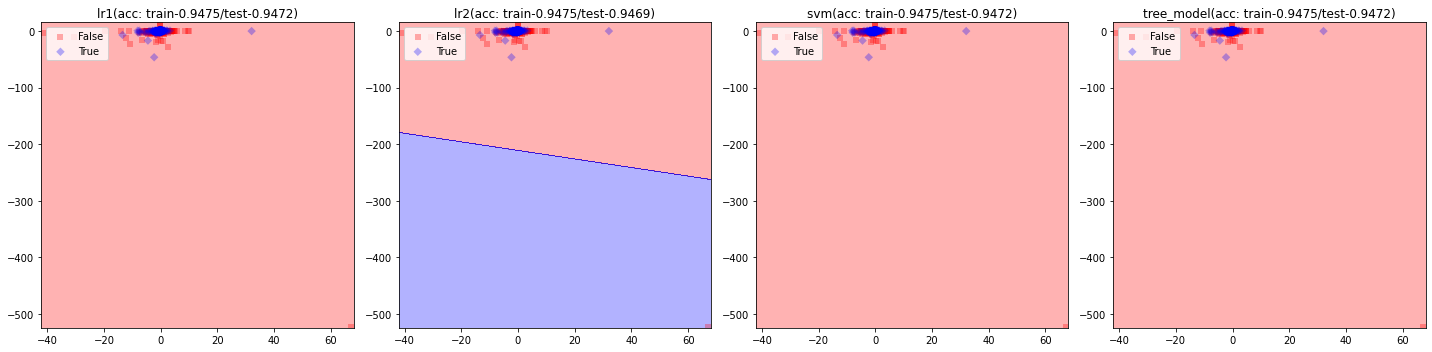

In [23]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
model_names = ["lr1", "lr2", "svm", "tree_model"]

# x1_span = fence_outliers(X_combined_std[:, 0], 20)
# x2_span = fence_outliers(X_combined_std[:, 1], 20)

fig, axs = plt.subplots(1, len(model_names), figsize=(5*len(model_names), 5))

for clf_name, ax in zip(model_names, axs):
    clf = eval(clf_name)
    test_idx = np.array((range(0, len(y_combined))), dtype=int)[-len(y_test):]
    plot_decision_regions(
        X=X_combined_std, 
        y=y_combined,
        classifier=clf, 
#         test_idx=test_idx,
        resolution=0.1,
        ax=ax
    )
    acc_train = clf.score(X_train_std, y_train)
    acc_test = clf.score(X_test_std, y_test)
    ax.set_title("{}(acc: train-{:.4f}/test-{:.4f})".format(clf_name, acc_train, acc_test))
#     ax.set_xlim(x1_span[0], x1_span[1])
#     ax.set_ylim(x2_span[0], x2_span[1])

fig.tight_layout()
fig.savefig('test_result.png', dpi=150, bbox_inches="tight")
fig.show()